In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [2]:
from keras.layers import Dropout,Flatten
from keras.utils import np_utils

In [3]:
np.random.seed(10)

In [4]:
start = pd.read_csv("C:/Users/anjum/Documents/Exelir workshop/Dataset/50_Startups.csv")

In [ ]:
start.head()

In [ ]:
start.describe()

In [5]:
# Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder

In [6]:

#converting into binary
lb = LabelEncoder()
start["State"] = lb.fit_transform(start["State"])

In [7]:
#Preparing the Training and Testing Data Sets
predictors = start.iloc[:,:4].values

In [8]:
outcomes = start.iloc[:,4].values

In [9]:
from sklearn import preprocessing


In [10]:
#one hot

min_max_scaler = preprocessing.MinMaxScaler()
predictors_scaled = min_max_scaler.fit_transform(predictors)
predictors_scaled[:5,]

array([[1.        , 0.65174393, 1.        , 1.        ],
       [0.98335946, 0.76197173, 0.94089337, 0.        ],
       [0.92798459, 0.37957895, 0.8646636 , 0.5       ],
       [0.87313643, 0.51299839, 0.81223513, 1.        ],
       [0.85943772, 0.30532804, 0.77613557, 0.5       ]])

In [11]:
from sklearn import model_selection
from keras import models, layers, metrics


In [12]:
#Finally, we split the data into a training set and a testing set. These will in turn be used to train and evaluate the regression model respectively.

X_train, X_test, y_train, y_test = model_selection.train_test_split(predictors, outcomes, test_size=0.33, random_state=22)
print('X_train {0}, y_train {1}'.format(X_train.shape, y_train.shape))
print('X_test {0}, y_test {1}'.format(X_test.shape, y_test.shape))

X_train (33, 4), y_train (33,)
X_test (17, 4), y_test (17,)


In [21]:
network = models.Sequential()
network.add(layers.Dense(20, activation='relu', input_shape=(X_train.shape[1], )))
network.add(layers.Dense(15, activation='relu'))
network.add(layers.Dense(1))
network.compile(optimizer='adam',
                loss='mean_squared_error')

In [22]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

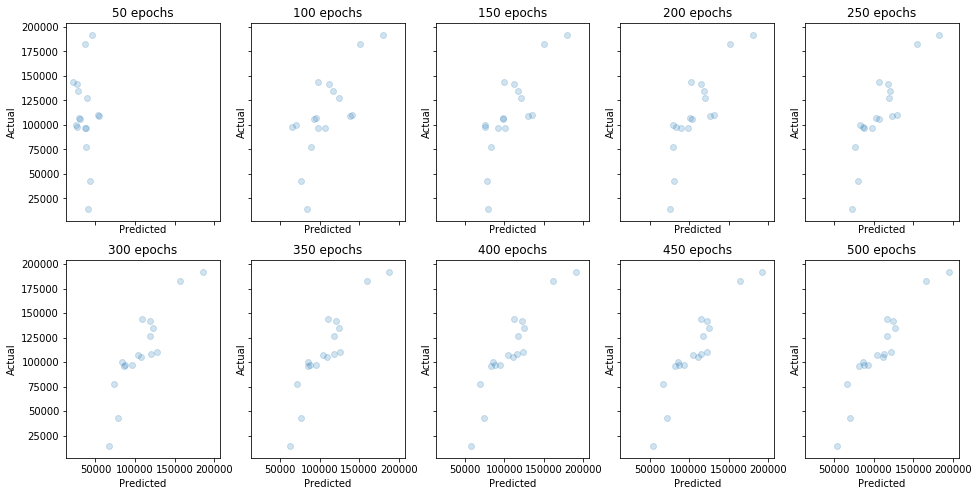

In [23]:
fig, axes = plt.subplots(2, 5, figsize=(16,8), sharex=True, sharey=True)
losses = []
for i in range(2):
    for j in range(5):
        network.fit(X_train, y_train, epochs=50, batch_size=128, verbose=0);
        pred_loss = network.evaluate(X_test, y_test, verbose=0)
        losses.append(pred_loss)
        preds = network.predict(X_test)
        axes[i,j].scatter(preds, y_test, alpha=0.2)
        axes[i,j].set_title('{0} epochs'.format((5*i+j+1)*50))
        axes[i,j].set_ylabel('Actual')
        axes[i,j].set_xlabel('Predicted')

Mean squared error: 140737322.38


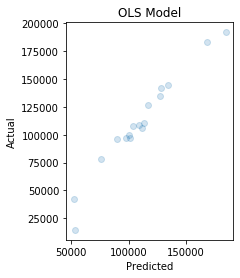

In [24]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
ols_y_pred = regr.predict(X_test)

fig, ax = plt.subplots(1, 1, figsize=(3,4))
ax.scatter(ols_y_pred, y_test, alpha=0.2)
ax.set_title('OLS Model'.format((5*i+j+1)*50))
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')

print("Mean squared error: {0:.2f}".format(mean_squared_error(y_test, ols_y_pred)))

Mean squared error: 1790219450.49


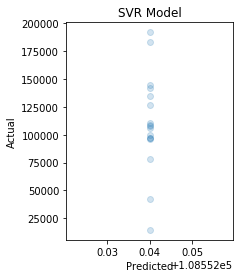

In [25]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), 
                   cv=5,
                   param_grid={'C': [1e0, 1e1, 1e2, 1e3],
                               'gamma': np.logspace(-2, 2, 5),
                               'epsilon': np.arange(0.1, 0.5, 0.1)})
svr.fit(X_train, y_train)
svr_y_pred = svr.best_estimator_.predict(X_test)
fig, ax = plt.subplots(1, 1, figsize=(3,4))
ax.scatter(svr_y_pred, y_test, alpha=0.2)
ax.set_title('SVR Model'.format((5*i+j+1)*50))
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')

print("Mean squared error: {0:.2f}".format(mean_squared_error(y_test, svr_y_pred)))

In [27]:
# Normalizing the inputs to fall under 0-1 by 
# diving the entire data with 255 (max pixel value)
X_train = X_train/255
X_test = X_test/255

# one hot encoding outputs for both train and test data sets 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


In [29]:
num_of_classes = y_test.shape[1]
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(17, 191793)

In [30]:
def design_mlp():
    # Initializing the model 
    model = Sequential()
    model.add(Dense(150,input_dim =784,activation="relu"))
    model.add(Dense(200,activation="tanh"))
    model.add(Dense(100,activation="tanh"))
    model.add(Dense(500,activation="tanh"))
    model.add(Dense(num_of_classes,activation="softmax"))
    model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
    return model

In [31]:
model = design_mlp()

In [33]:
model.fit(x=X_train,y=y_train,batch_size=1000,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20


ValueError: in user code:

    C:\Users\anjum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\anjum\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\anjum\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\anjum\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\anjum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:531 train_step  **
        y_pred = self(x, training=True)
    C:\Users\anjum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:886 __call__
        self.name)
    C:\Users\anjum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape [None, 4]
